In [1]:
import os
import datetime

import tensorflow as tf
from matplotlib import pyplot as plt

from utils.image_transformation import random_jitter, normalize
from utils.mnist_loader import get_mnist_data_set
from utils.model_utils import u_net_generator, discriminator, plot_transformations, UNetLayerConfiguration, \
    DownsampleLayerConfiguration, LayerConfiguration, create_training_function, get_instance_data_set_generator

In [25]:
# create directory for logs

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)

# init summary writer
summary_writer = tf.summary.create_file_writer(logs_base_dir + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [3]:
# get samples of images with digits '1' and '7' in correct format
X_1s, X_7s = get_mnist_data_set()

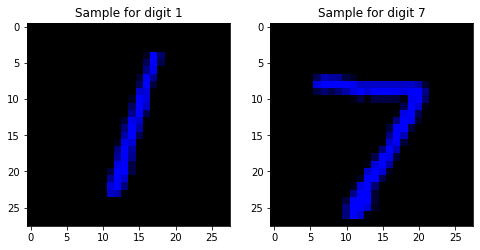

In [4]:
# show a sample per digit

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Sample for digit 1')
plt.imshow(normalize(X_1s[0]) * 0.5 + 0.5)

plt.subplot(122)
plt.title('Sample for digit 7')
plt.imshow(normalize(X_7s[0]) * 0.5 + 0.5)

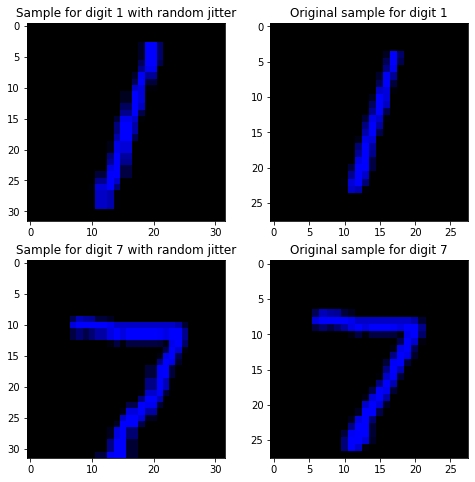

In [6]:
# show a sample per digit with applied random jitter

new_image_1 = normalize(random_jitter(X_1s[0], target_size=(32, 32), mirror=False))
new_image_7 = normalize(random_jitter(X_7s[0], target_size=(32, 32), mirror=False))

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.title('Sample for digit 1 with random jitter')
plt.imshow(new_image_1 * 0.5 + 0.5)

plt.subplot(222)
plt.title('Original sample for digit 1')
plt.imshow(normalize(X_1s[0]) * 0.5 + 0.5)

plt.subplot(223)
plt.title('Sample for digit 7 with random jitter')
plt.imshow(new_image_7 * 0.5 + 0.5)

plt.subplot(224)
plt.title('Original sample for digit 7')
plt.imshow(normalize(X_7s[0]) * 0.5 + 0.5)

In [32]:
# define architecture of networks and initialize networks

# how many output channels to have
output_channels = 3

# define generator architecture
u_net_encoder_decoder_layers = tuple([UNetLayerConfiguration(16, 3, apply_norm=False), UNetLayerConfiguration(32, 3), 
                                      UNetLayerConfiguration(64, 3)])
u_net_connecting_layers = tuple([DownsampleLayerConfiguration(64, 3)])

# define discriminator architecture
discriminator_downsampling_layers = tuple([DownsampleLayerConfiguration(16, 3, apply_norm=False), 
                                           DownsampleLayerConfiguration(32, 3)])
discriminator_final_convolution_layer = LayerConfiguration(64, 3)

# initialize generators
generator_x2y = u_net_generator(output_channels=output_channels, encoder_decoder_layers=u_net_encoder_decoder_layers,
                    connecting_layers=u_net_connecting_layers, input_shape=(32, 32, 3), kernel_size_last_layer=3)
generator_y2x = u_net_generator(output_channels=output_channels, encoder_decoder_layers=u_net_encoder_decoder_layers,
                    connecting_layers=u_net_connecting_layers, input_shape=(32, 32, 3), kernel_size_last_layer=3)

# initialize discriminators
discriminator_x = discriminator(input_shape=(32, 32, 3), downsampling_layers=discriminator_downsampling_layers,
                                final_convolution_layer=discriminator_final_convolution_layer, kernel_size_last_layer=3)
discriminator_y = discriminator(input_shape=(32, 32, 3), downsampling_layers=discriminator_downsampling_layers,
                                final_convolution_layer=discriminator_final_convolution_layer, kernel_size_last_layer=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


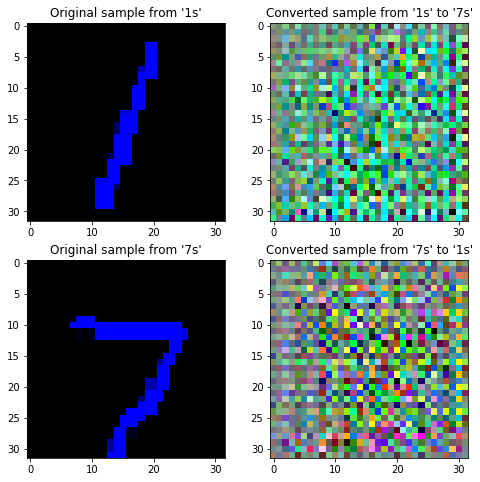

In [33]:
# plot transformations (before training)
plot_transformations(new_image_1, new_image_7, generator_x2y, generator_y2x, distributions_names=('1s', '7s'))

In [34]:
# get data set generators

# define function to apply on each data sample
function_to_apply_per_instance=lambda image: \
    tf.cast([normalize(random_jitter(image, target_size=(32, 32), mirror=False))], tf.float32)

data_set_generator_x = get_instance_data_set_generator(X_1s[:200], function_to_apply_per_instance)
data_set_generator_y = get_instance_data_set_generator(X_7s[:200], function_to_apply_per_instance)

In [35]:
run_epoch = create_training_function(generator_x2y, discriminator_x, generator_y2x, discriminator_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

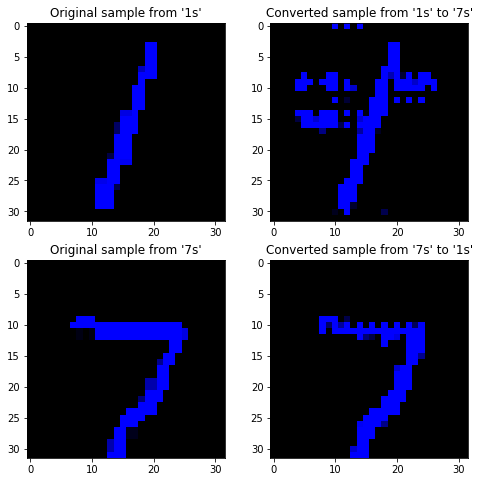

Generated data in iteration 20. Average time per epoch was 2.6310970902442934s.
Generated data in iteration 40. Average time per epoch was 2.1905889391899107s.
Generated data in iteration 60. Average time per epoch was 2.1589818716049196s.
Generated data in iteration 80. Average time per epoch was 2.1597699403762816s.
Generated data in iteration 100. Average time per epoch was 2.1631128668785093s.
Generated data in iteration 120. Average time per epoch was 2.202268123626709s.
Generated data in iteration 140. Average time per epoch was 2.16111044883728s.
Generated data in iteration 160. Average time per epoch was 2.158967745304108s.
Generated data in iteration 180. Average time per epoch was 2.15633682012558s.
Generated data in iteration 200. Average time per epoch was 2.19037321805954s.
Generated data in iteration 220. Average time per epoch was 2.1615302681922914s.
Generated data in iteration 240. Average time per epoch was 2.1604785919189453s.
Generated data in iteration 260. Average

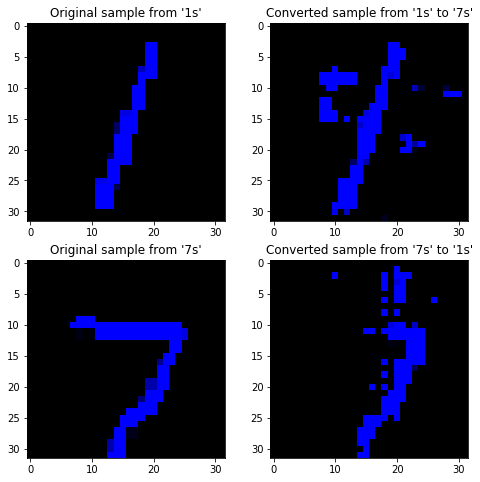

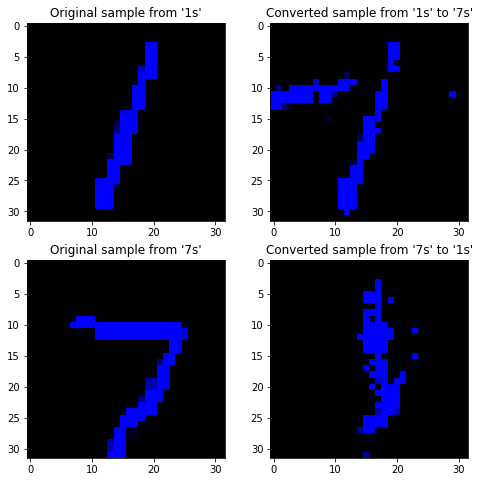

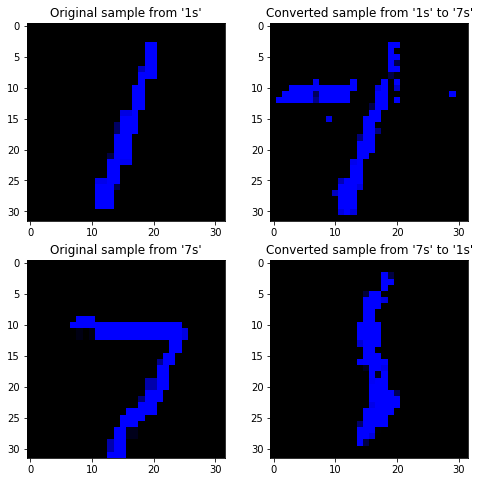

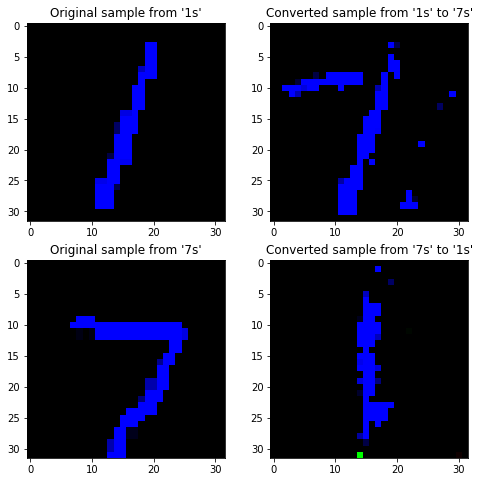

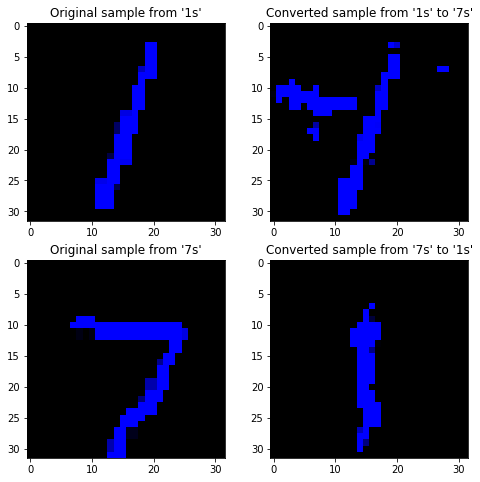

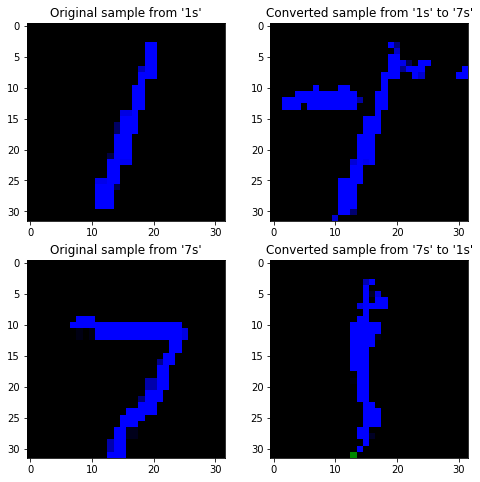

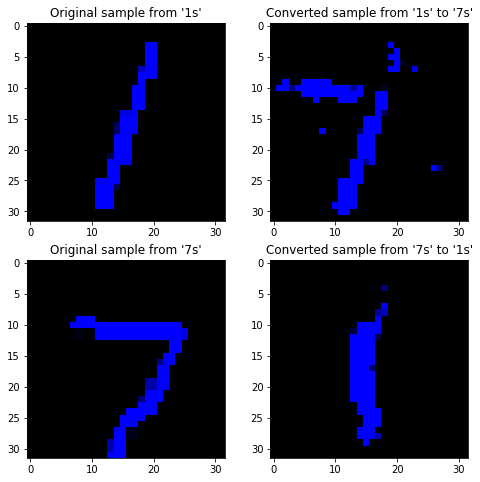

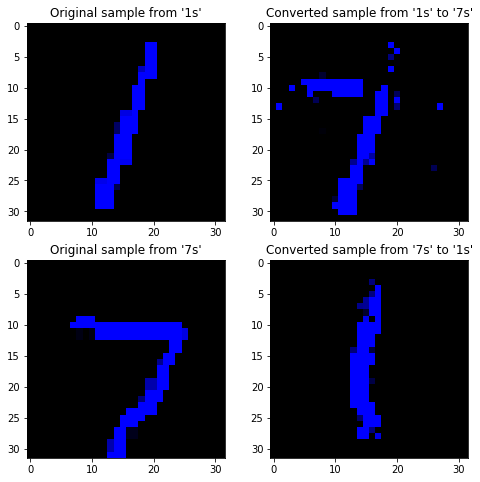

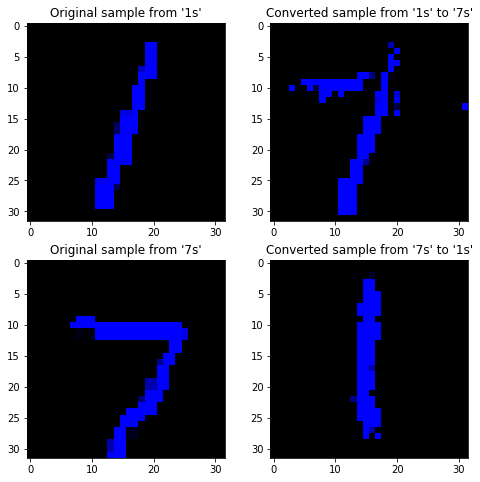

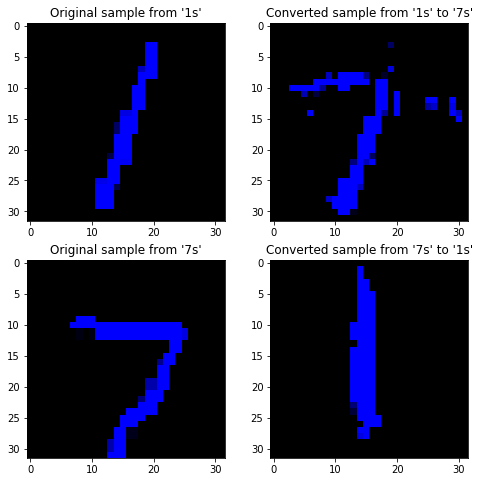

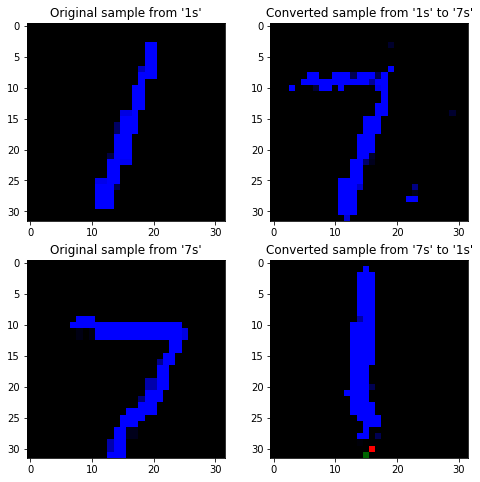

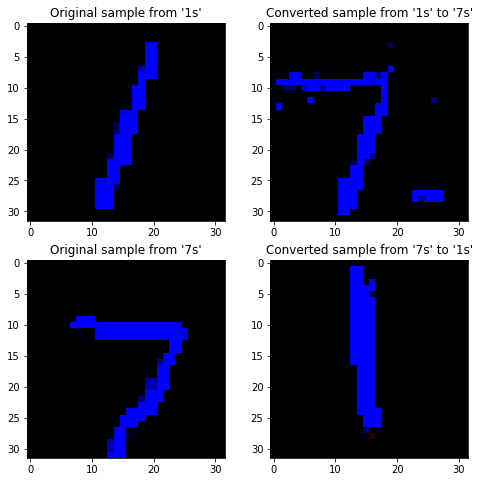

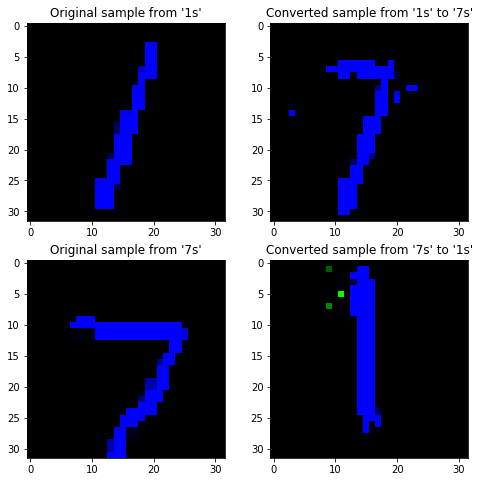

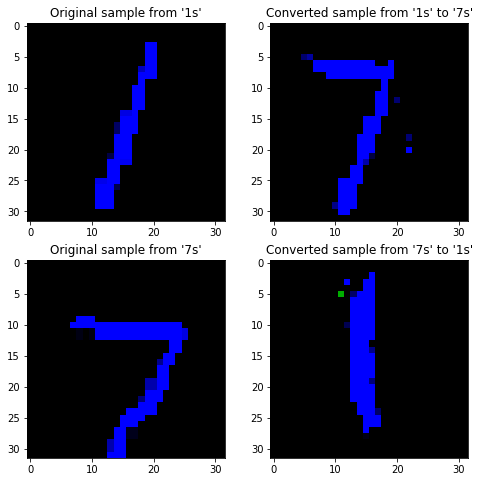

In [36]:
sum_time = 0

for i in range(300):
    tm = run_epoch(data_set_generator_x, data_set_generator_y, 200, epoch=i, summary_writer=summary_writer)
    sum_time = sum_time + tm
    if (i + 1) % 20 == 0:
        plot_transformations(new_image_1, new_image_7, generator_x2y, generator_y2x, distributions_names=('1s', '7s'))
        print("Generated data in iteration {}. Average time per epoch was {}s.".format(i+1, sum_time/20))
        sum_time = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


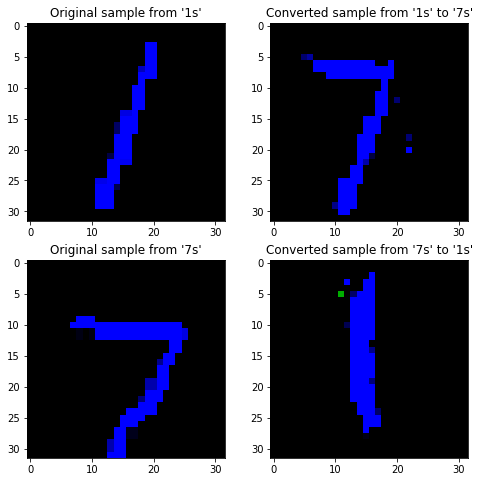

In [37]:
# plot transformations (after training)
plot_transformations(new_image_1, new_image_7, generator_x2y, generator_y2x, distributions_names=('1s', '7s'))

